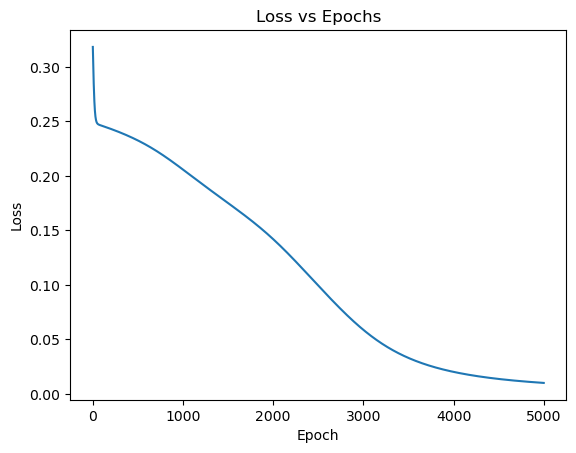

Predictions:
[[0.059]
 [0.905]
 [0.897]
 [0.129]]


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# ---------------------------
# Step 2: Activation function
# ---------------------------
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# ---------------------------
# Step 3: Dataset
# (XOR example)
# ---------------------------
X = np.array([
    [0,0],
    [0,1],
    [1,0],
    [1,1]
])

y = np.array([[0],[1],[1],[0]])

# ---------------------------
# Step 4: Initialize weights
# ---------------------------
np.random.seed(42)

input_size = 2
hidden_size = 3
output_size = 1

W1 = np.random.randn(input_size, hidden_size)
b1 = np.zeros((1, hidden_size))

W2 = np.random.randn(hidden_size, output_size)
b2 = np.zeros((1, output_size))

# ---------------------------
# Training params
# ---------------------------
lr = 0.1
epochs = 5000
losses = []

# ---------------------------
# Step 5–8: Training loop
# ---------------------------
for epoch in range(epochs):

    # ---- Forward pass ----
    z1 = X @ W1 + b1
    a1 = sigmoid(z1)

    z2 = a1 @ W2 + b2
    y_hat = sigmoid(z2)

    # ---- Step 6: Loss ----
    loss = np.mean((y - y_hat)**2)
    losses.append(loss)

    # ---- Step 7: Backprop ----
    d_loss = (y_hat - y)

    d_z2 = d_loss * sigmoid_derivative(y_hat)
    d_W2 = a1.T @ d_z2
    d_b2 = np.sum(d_z2, axis=0, keepdims=True)

    d_a1 = d_z2 @ W2.T
    d_z1 = d_a1 * sigmoid_derivative(a1)
    d_W1 = X.T @ d_z1
    d_b1 = np.sum(d_z1, axis=0, keepdims=True)

    # ---- Step 8: Update ----
    W2 -= lr * d_W2
    b2 -= lr * d_b2
    W1 -= lr * d_W1
    b1 -= lr * d_b1

# ---------------------------
# Step 10: Plot loss
# ---------------------------
plt.plot(losses)
plt.title("Loss vs Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

# ---------------------------
# Step 11: Test model
# ---------------------------
print("Predictions:")
z1 = X @ W1 + b1
a1 = sigmoid(z1)
z2 = a1 @ W2 + b2
y_hat = sigmoid(z2)
print(np.round(y_hat, 3))